In [2]:

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import scipy.io as sio
import processing.save_adc_data as sd


To load your data, please make sure the file paths are all correct. The variables/functions are setup expecting a specific way of your project directory organization, however it is up to you how you want to organize it. Step through these variables to make sure you are loading what is expected. 

In [3]:
# TODO: Put the *name* of your .bin file here (excluding the .bin)
filename = r"1"
# TODO: Put the *path* to the project folder
home_dir = r"/Users/shanbhag/Documents/School/comm-proj-radars"
# TODO: Put the path (relative to home_dir) of the captured data folder
capture_data_dir = r"data"
# TODO: Put the path (relative to home_dir) and name of the JSON files (exlude the .setup.json and .mmwave.json)
json_filename = r"scripts/chirp1"

Loading the data requires loading the *.bin file you measured and converting it to a *.mat file. You only have to do this conversion once if the data has not changed in that file. Then we load the *.mat file and extract the raw data.

In [4]:
############################# Reformat the Data #############################
if not os.path.exists(os.path.join(home_dir,"rdc_" + filename + '.mat')):
    sd.save_adc_data(filename, home_dir, capture_data_dir, json_filename)

################################# load data #################################
bin_data = sio.loadmat(os.path.join(home_dir,capture_data_dir,"rdc_" + filename + '.mat'))
raw_data = np.array(bin_data['data_raw'])

print("You captured %d frames, for %d TX, %d Rx, and %d adc samples" % raw_data.shape)

/Users/shanbhag/Documents/School/comm-proj-radars/data/raw_1
/Users/shanbhag/Documents/School/comm-proj-radars/data/rdc_1
Input ADC data parameters:
    dataFmt: 1
    iqSwap: 0
    chanInterleave: 1
    numChirpsPerFrame: 3
    adcBits: 2
    numRxChan: 4
    numAdcSamples: 512
Radarcube parameters:
    iqSwap: 0
    radarCubeFmt: 1
    numDopplerChirps: 1
    numRxChan: 4
    numTxChan: 3
    numRangeBins: 512.0
You captured 20 frames, for 3 TX, 4 Rx, and 512 adc samples


There are some simple signal processing we can do to have a coarse understanding of what we've received. Below, is code for processing and plotting the range FFT. 

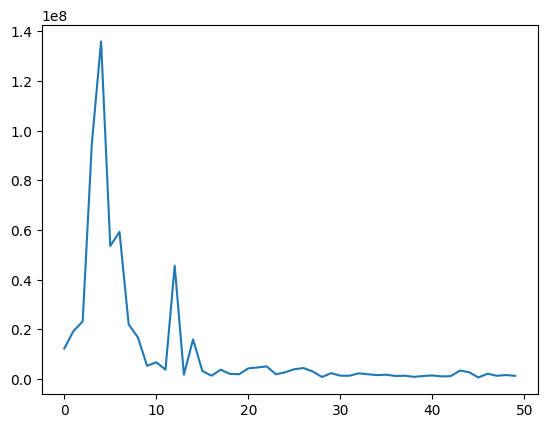

In [8]:
############################### process data! ################################
# Range FFT
rfft = scipy.fft.fft(raw_data, axis=3)
plt.plot(abs(np.squeeze(np.sum(rfft[:,:,:,0:50],axis=(0,2,1)))))


<h5>Exercise 1:</h5> Find the distance of the maximum reflector in the enivornment for the two data files provided. Show your code and print out the values in the next cell.

In [9]:
######## Find the distance of the maximum reflector in front of the radar. #############
# TODO: add your code here

<h5>Exercise 2:</h5> Now you will have to fill in some code we provide for different methods of radar imaging. Here we have given you the skeleton of the code for a 2D beamforming algorithm which you must fill in to get the 2D heatmap of the scene in polar coordinates.

In [ ]:
######## 2D Imaging in Polar #############


Now finish the code for a 2D matched filter algorithm for 2D heatmap of the scene in cartesian coordinates.

In [ ]:
######## 2D Imaging in Cartesian #############

Finally, we will perform matched filter on multiple depths in the enivornment. Finish the code in order to view the imaged items in 3D!

In [ ]:
######## 3D Imaging in Polar #############